
# Final Project Report(Milestone 1 to 5) 


### Milestone 1 : Data Source
#### https://www.kaggle.com/c/zillow-prize-1

#### Description
There are two data sets with over 1 million records each and 58 columns. properties_2016 and properties_2017 datasets contain data for each year. The data we will use for this project will be a small sample of the master data. 

The two datasets are linked by parcleid.

I transactions dataset, the trabsaction date shows the date the property was sold and logerror is the log10( estimated price - price sold).

Properties dataset has the physical information about the properities. The columns on the properties dataset will have to be renamed. Subsets of data can be used to group by region, and other features such as number of bedrooms, square footage, etc.


In [1]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
import numpy as np
# Load Data
transactions_2016 = "Data/transactions_2016.json"
transactions_2017 = "Data/transactions_2017.json"

properties_2016  =  "Data/properties_2016.csv"
properties_2017  =  "Data/properties_2017.csv"
data_dictionary = "Data/data_dictionary.xlsx"

transactions_2016 = pd.read_json(transactions_2016)
transactions_2017 = pd.read_json(transactions_2017)
properties_2016 = pd.read_csv(properties_2016)
properties_2017 = pd.read_csv(properties_2017)
data_dictionary = pd.read_excel(data_dictionary)

C:\Users\safar\AppData\Local\Temp\ipykernel_31408\2544282703.py:16: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2016 = pd.read_csv(properties_2016)
C:\Users\safar\AppData\Local\Temp\ipykernel_31408\2544282703.py:17: DtypeWarning: Columns (23,50) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2017 = pd.read_csv(properties_2017)


In [47]:
transactions_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [48]:
properties_2016.head()

,Unnamed: 0,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015,9.0,NaN,NaN,NaN,NaN
1,1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015,27516.0,NaN,NaN,NaN,NaN
2,2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015,762631.0,20800.37,NaN,NaN,NaN
3,3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,...,1.0,NaN,571346.0,1156834.0,2015,585488.0,14557.57,NaN,NaN,NaN
4,4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015,239695.0,5725.17,NaN,NaN,NaN


In [49]:
print(len(properties_2016.columns))
print(properties_2016.columns)

59
Index(['Unnamed: 0', 'parcelid', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuild

In [50]:
print(len(properties_2017.columns))
print(properties_2017.columns)

59
Index(['Unnamed: 0', 'parcelid', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuild

In [51]:
print(len(transactions_2016.columns))
print(transactions_2016.columns)

3
Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')


In [52]:
print(len(transactions_2017.columns))
print(transactions_2017.columns)

3
Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')


In [53]:
data_dictionary.head()

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home


## Milestone 2 : Cleaning/formatting flat file sources



We will first combine the properties_2016 and properties_2017 and calle the result properties. We will also combine the two transactions datasets.


In [54]:
properties = pd.concat([properties_2016,properties_2017],axis=0)
print(properties_2016.shape)
print(properties_2017.shape)
print(properties.shape)

(20000, 59)
(20000, 59)
(40000, 59)


In [55]:
transactions = pd.concat([transactions_2016,transactions_2017],axis=0)
print(properties_2016.shape)
print(properties_2017.shape)
print(properties.shape)

(20000, 59)
(20000, 59)
(40000, 59)


In [56]:
properties.columns

Index(['Unnamed: 0', 'parcelid', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuilding

Get rid of the Unamed column.

In [57]:
properties = properties.loc[:, ~properties.columns.str.contains('^Unnamed')]
properties.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

Rename column names in properties dataset.

In [58]:
properties = properties.rename(columns=
                        {
  'parcelid':'parcelid', 
  'yearbuilt':'build_year', 
  'basementsqft':'area_basement', 
  'yardbuildingsqft17':'area_patio', 
  'yardbuildingsqft26':'area_shed',  
  'poolsizesum':'area_pool', 
  'lotsizesquarefeet':'area_lot', 
  'garagetotalsqft':'area_garage', 
  'finishedfloor1squarefeet':'area_firstfloor_finished', 
  'calculatedfinishedsquarefeet':'area_total_calc', 
  'finishedsquarefeet6':'area_base', 
  'finishedsquarefeet12':'area_live_finished', 
  'finishedsquarefeet13':'area_liveperi_finished', 
  'finishedsquarefeet15':'area_total_finished',  
  'finishedsquarefeet50':'area_unknown', 
  'unitcnt': 'num_unit', 
  'numberofstories': 'num_story',  
  'roomcnt':'num_room', 
  'bathroomcnt':'num_bathroom', 
  'bedroomcnt':'num_bedroom', 
  'calculatedbathnbr':'num_bathroom_calc', 
  'fullbathcnt':'num_bath', 
  'threequarterbathnbr':'num_75_bath',  
  'fireplacecnt':'num_fireplace', 
  'poolcnt': 'num_pool',  
  'garagecarcnt':'num_garage', 
  'regionidcounty':'region_county', 
  'regionidcity':'region_city', 
  'regionidzip':'region_zip', 
  'regionidneighborhood':'region_neighbor', 
  'taxvaluedollarcnt':'tax_total', 
  'structuretaxvaluedollarcnt':'tax_building', 
  'landtaxvaluedollarcnt':'tax_land', 
  'taxamount':'tax_property', 
  'assessmentyear':'tax_year', 
  'taxdelinquencyflag':'tax_delinquency', 
  'taxdelinquencyyear':'tax_delinquency_year', 
  'propertyzoningdesc':'zoning_property', 
  'propertylandusetypeid':'zoning_landuse', 
  'propertycountylandusecode':'zoning_landuse_county', 
  'fireplaceflag':'flag_fireplace', 
  'hashottuborspa':'flag_tub', 
  'buildingqualitytypeid':'quality', 
  'buildingclasstypeid':'framing', 
  'typeconstructiontypeid':'material', 
  'decktypeid':'deck', 
  'storytypeid':'story', 
  'heatingorsystemtypeid':'heating', 
  'airconditioningtypeid':'aircon', 
  'architecturalstyletypeid':'architectural_style' 
})

In [59]:
properties.columns

Index(['parcelid', 'aircon', 'architectural_style', 'area_basement',
       'num_bathroom', 'num_bedroom', 'framing', 'quality',
       'num_bathroom_calc', 'deck', 'area_firstfloor_finished',
       'area_total_calc', 'area_live_finished', 'area_liveperi_finished',
       'area_total_finished', 'area_unknown', 'area_base', 'fips',
       'num_fireplace', 'num_bath', 'num_garage', 'area_garage', 'flag_tub',
       'heating', 'latitude', 'longitude', 'area_lot', 'num_pool', 'area_pool',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'zoning_landuse_county',
       'zoning_landuse', 'zoning_property', 'rawcensustractandblock',
       'region_city', 'region_county', 'region_neighbor', 'region_zip',
       'num_room', 'story', 'num_75_bath', 'material', 'num_unit',
       'area_patio', 'area_shed', 'build_year', 'num_story', 'flag_fireplace',
       'tax_building', 'tax_total', 'tax_year', 'tax_land', 'tax_property',
       'tax_delinquency', 'tax_delinquency_year', 'censustractandbl

In [60]:
# Check new column names
properties[['num_bedroom','num_bathroom']]

,num_bedroom,num_bathroom
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
19995,2.0,1.0
19996,5.0,3.0
19997,8.0,5.0
19998,4.0,2.0


Rename column names in transactions dataset.

In [61]:
transactions = transactions.rename(columns={'parcelid':'parcelid','date':'transactiondate'})

In [18]:
transactions.columns

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')

Check out the new columns

In [19]:
transactions[['parcelid','transactiondate']]

,parcelid,transactiondate
0,11016594,2016-01-01
1,14366692,2016-01-01
2,12098116,2016-01-01
3,12643413,2016-01-02
4,14432541,2016-01-02
...,...,...
77608,10833991,2017-09-20
77609,11000655,2017-09-20
77610,17239384,2017-09-21
77611,12773139,2017-09-21


In [20]:
propertiesAndTransactions = pd.merge(properties,transactions,on='parcelid')


check out the merge

In [21]:
propertiesAndTransactions[['parcelid','num_bedroom','transactiondate','logerror']].head()

,parcelid,num_bedroom,transactiondate,logerror
0,17054981,4.0,2017-06-15,-0.013099
1,17054981,4.0,2017-06-15,-0.013099
2,17055743,3.0,2017-07-26,0.073985
3,17055743,3.0,2017-07-26,0.073985
4,17068109,3.0,2017-07-28,0.071886


let's take of missings

In [22]:
column_names = propertiesAndTransactions.columns
print('sum\n', propertiesAndTransactions.isnull()[column_names].sum())

sum
 parcelid                       0
aircon                      1485
architectural_style         2234
area_basement               2234
num_bathroom                   0
num_bedroom                    0
framing                     2234
quality                      705
num_bathroom_calc             26
deck                        2214
area_firstfloor_finished    2000
area_total_calc                9
area_live_finished           102
area_liveperi_finished      2234
area_total_finished         2145
area_unknown                2000
area_base                   2230
fips                           0
num_fireplace               1982
num_bath                      26
num_garage                  1593
area_garage                 1593
flag_tub                    2192
heating                      752
latitude                       0
longitude                      0
area_lot                     216
num_pool                    1708
area_pool                   2206
pooltypeid10                2216
poolt

In [23]:
print('mean\n', propertiesAndTransactions.isnull()[column_names].mean())

mean
 parcelid                    0.000000
aircon                      0.664727
architectural_style         1.000000
area_basement               1.000000
num_bathroom                0.000000
num_bedroom                 0.000000
framing                     1.000000
quality                     0.315577
num_bathroom_calc           0.011638
deck                        0.991047
area_firstfloor_finished    0.895255
area_total_calc             0.004029
area_live_finished          0.045658
area_liveperi_finished      1.000000
area_total_finished         0.960161
area_unknown                0.895255
area_base                   0.998209
fips                        0.000000
num_fireplace               0.887198
num_bath                    0.011638
num_garage                  0.713071
area_garage                 0.713071
flag_tub                    0.981200
heating                     0.336616
latitude                    0.000000
longitude                   0.000000
area_lot                    0.09

Let's look at columns woth more than 80% missing values

In [24]:
propertiesAndTransactions.isnull()[column_names].sum()
# this shows columns and the number of NaN's.Note parcelID has no missing values.

parcelid                       0
aircon                      1485
architectural_style         2234
area_basement               2234
num_bathroom                   0
num_bedroom                    0
framing                     2234
quality                      705
num_bathroom_calc             26
deck                        2214
area_firstfloor_finished    2000
area_total_calc                9
area_live_finished           102
area_liveperi_finished      2234
area_total_finished         2145
area_unknown                2000
area_base                   2230
fips                           0
num_fireplace               1982
num_bath                      26
num_garage                  1593
area_garage                 1593
flag_tub                    2192
heating                      752
latitude                       0
longitude                      0
area_lot                     216
num_pool                    1708
area_pool                   2206
pooltypeid10                2216
pooltypeid

Make a list of columns with moe than 80% missing data

In [25]:
remove_columns = propertiesAndTransactions.columns[propertiesAndTransactions.isnull().mean() > .8]
print(remove_columns)

Index(['architectural_style', 'area_basement', 'framing', 'deck',
       'area_firstfloor_finished', 'area_liveperi_finished',
       'area_total_finished', 'area_unknown', 'area_base', 'num_fireplace',
       'flag_tub', 'area_pool', 'pooltypeid10', 'pooltypeid2', 'story',
       'num_75_bath', 'material', 'area_patio', 'area_shed', 'num_story',
       'flag_fireplace', 'tax_delinquency', 'tax_delinquency_year'],
      dtype='object')


Drop the columns

In [26]:
propertiesAndTransactions = propertiesAndTransactions.drop(columns = remove_columns)

Check results

In [27]:
print(len(propertiesAndTransactions.columns))
print(propertiesAndTransactions.columns)

37
Index(['parcelid', 'aircon', 'num_bathroom', 'num_bedroom', 'quality',
       'num_bathroom_calc', 'area_total_calc', 'area_live_finished', 'fips',
       'num_bath', 'num_garage', 'area_garage', 'heating', 'latitude',
       'longitude', 'area_lot', 'num_pool', 'pooltypeid7',
       'zoning_landuse_county', 'zoning_landuse', 'zoning_property',
       'rawcensustractandblock', 'region_city', 'region_county',
       'region_neighbor', 'region_zip', 'num_room', 'num_unit', 'build_year',
       'tax_building', 'tax_total', 'tax_year', 'tax_land', 'tax_property',
       'censustractandblock', 'logerror', 'transactiondate'],
      dtype='object')


Check results

In [28]:
print(len(propertiesAndTransactions.columns))
print(propertiesAndTransactions.columns)

37
Index(['parcelid', 'aircon', 'num_bathroom', 'num_bedroom', 'quality',
       'num_bathroom_calc', 'area_total_calc', 'area_live_finished', 'fips',
       'num_bath', 'num_garage', 'area_garage', 'heating', 'latitude',
       'longitude', 'area_lot', 'num_pool', 'pooltypeid7',
       'zoning_landuse_county', 'zoning_landuse', 'zoning_property',
       'rawcensustractandblock', 'region_city', 'region_county',
       'region_neighbor', 'region_zip', 'num_room', 'num_unit', 'build_year',
       'tax_building', 'tax_total', 'tax_year', 'tax_land', 'tax_property',
       'censustractandblock', 'logerror', 'transactiondate'],
      dtype='object')


Let's check the missing values mean

In [29]:
print('mean\n', propertiesAndTransactions.isnull()[propertiesAndTransactions.columns].mean())
# we see the means to all be below 80%.

mean
 parcelid                  0.000000
aircon                    0.664727
num_bathroom              0.000000
num_bedroom               0.000000
quality                   0.315577
num_bathroom_calc         0.011638
area_total_calc           0.004029
area_live_finished        0.045658
fips                      0.000000
num_bath                  0.011638
num_garage                0.713071
area_garage               0.713071
heating                   0.336616
latitude                  0.000000
longitude                 0.000000
area_lot                  0.096688
num_pool                  0.764548
pooltypeid7               0.775291
zoning_landuse_county     0.000000
zoning_landuse            0.000000
zoning_property           0.303491
rawcensustractandblock    0.000000
region_city               0.018800
region_county             0.000000
region_neighbor           0.530886
region_zip                0.000895
num_room                  0.000000
num_unit                  0.303939
build_year    

Are there any duplicate?

In [30]:
propertiesAndTransactions[propertiesAndTransactions.duplicated(keep=False)]
# There are no duplocate rows; however, there are duplicate parcelIDs and corresponding latitude and Longitude.

,parcelid,aircon,num_bathroom,num_bedroom,quality,num_bathroom_calc,area_total_calc,area_live_finished,fips,num_bath,...,num_unit,build_year,tax_building,tax_total,tax_year,tax_land,tax_property,censustractandblock,logerror,transactiondate


In [31]:
propertiesAndTransactions

,parcelid,aircon,num_bathroom,num_bedroom,quality,num_bathroom_calc,area_total_calc,area_live_finished,fips,num_bath,...,num_unit,build_year,tax_building,tax_total,tax_year,tax_land,tax_property,censustractandblock,logerror,transactiondate
0,17054981,NaN,5.0,4.0,NaN,5.0,3760.0,3760.0,6111,5.0,...,NaN,1982.0,494390.0,859741.0,2015,365351.0,9608.74,6.111001e+13,-0.013099,2017-06-15
1,17054981,NaN,5.0,4.0,NaN,5.0,3760.0,3760.0,6111,5.0,...,NaN,1982.0,501928.0,872850.0,2016,370922.0,9673.46,6.111000e+13,-0.013099,2017-06-15
2,17055743,NaN,2.0,3.0,NaN,2.0,1444.0,1444.0,6111,2.0,...,NaN,1951.0,128881.0,429608.0,2015,300727.0,5494.04,6.111001e+13,0.073985,2017-07-26
3,17055743,NaN,2.0,3.0,NaN,2.0,1444.0,1444.0,6111,2.0,...,NaN,1951.0,130845.0,436157.0,2016,305312.0,5538.80,6.111000e+13,0.073985,2017-07-26
4,17068109,NaN,1.5,3.0,NaN,1.5,1698.0,1698.0,6111,1.0,...,NaN,1979.0,190508.0,282303.0,2015,91795.0,2954.74,6.111001e+13,0.071886,2017-07-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,11769554,NaN,3.0,4.0,4.0,3.0,1482.0,1482.0,6037,3.0,...,1.0,1999.0,161596.0,234433.0,2016,72837.0,2991.31,6.037230e+13,0.682100,2016-06-14
2230,11778756,NaN,2.0,7.0,7.0,2.0,2693.0,NaN,6037,2.0,...,2.0,1905.0,18962.0,60552.0,2015,41590.0,908.73,6.037210e+13,0.090780,2017-03-07
2231,11778756,NaN,2.0,7.0,4.0,2.0,2693.0,NaN,6037,2.0,...,2.0,1905.0,19251.0,61475.0,2016,42224.0,908.73,6.037210e+13,0.090780,2017-03-07
2232,11779780,1.0,2.0,2.0,10.0,2.0,1621.0,1621.0,6037,2.0,...,1.0,1983.0,456300.0,774900.0,2015,318600.0,10454.87,6.037208e+13,-0.122200,2016-07-15


In [32]:
# Write scraped data to a file for safe keeps and also to avoid rescraping during development
propertiesAndTransactions.to_csv("data/propertiesAndTransactions.csv")

The two datasets have been merged, columns with more than 80% missing values were removed. The final dataset 'propertiesAndTransactions' will be used in the next milestone.

## Milestone 3. Webscaraping Data Source
#### Description
Using webscraping techniques, we will use 'latitude', 'longitude' from properties dataset to access properties and get current data for those locations. The property description of homes in given region will be stored into a dataset with as many features as in properties dataset we can grab. This dataset can then be used to do some price comparision between properties in 2016 and 2017. Getting data from years prior(say 10 years), we will be able to create trend charts and see market fluctuations.

In [33]:
# Build a table consisiting of the parcelID, latitude and longitude of the properties.
# This table will be used to get data from www.trulia.com by web scraping

LonLat = pd.DataFrame(propertiesAndTransactions[['parcelid','latitude','longitude']])
LonLat


,parcelid,latitude,longitude
0,17054981,34449407,-119254052
1,17054981,34449407,-119254052
2,17055743,34454169,-119237898
3,17055743,34454169,-119237898
4,17068109,34365693,-119448392
...,...,...,...
2229,11769554,34006415,-118246669
2230,11778756,34050678,-118282732
2231,11778756,34050678,-118282732
2232,11779780,34045100,-118261000


In [62]:
# We will remove duplicate parcelIDs here since we are only interested in comparable values near each parcelID.
LonLat = LonLat.sort_values('parcelid', ascending=False)
LonLat = LonLat.drop_duplicates() 
LonLat.reset_index(drop=True)
LonLat

,parcelid,latitude,longitude
1761,17299670,34186100,-118767000
107,17296734,34174051,-118757031
1758,17294231,34153879,-118839561
1756,17293716,34152179,-118851454
1427,17292856,34125457,-118891074
...,...,...,...
112,10726315,34184300,-118657000
110,10725532,34196000,-118658000
1767,10722858,34195746,-118624097
108,10722336,34199100,-118633000


In [63]:
print('sum\n', LonLat.isnull()[['parcelid','latitude','longitude']].sum())

sum
 parcelid     0
latitude     0
longitude    0
dtype: int64


In [64]:
# This dictionary is used to return state code. trulia requires the state code rather than state name
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [69]:
import urllib.request
import urllib.parse
import urllib.error
import json
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import geopy
from geopy.geocoders import Nominatim    

def create_url(city,state,zipcode):
    # Creating trulia URL based on the filter.

    url = "https://www.trulia.com/" + state + "/" + city + "/" + zipcode
    return url

def get_response(url):
    ret = None
    try:
        for i in range(5):
            response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
            print("status code received:", response.status_code)
            if (response.status_code != 200):
                return None
            else:
                return response
    except:
        print('exception in get_response')
        return None

def GetCityStateZip(lat,lon):
    lat = lat/10**6
    lon = lon/10**6
    #geolocator = Nominatim(timeout=5)
    geolocator = Nominatim(user_agent='safarie1103@gmail.com')
    #print(location.raw)
    try:
        location = geolocator.reverse((lat, lon))
        city = location.raw['address']['city']
        state = us_state_abbrev[location.raw['address']['state']]
        zipcode = location.raw['address']['postcode'].split('-')[0]
    except:
        city = ""
        state = ""    
        zipcode = ""
    
    return city,state,zipcode

In [70]:

def GetComp(parcelId,latitude,longitude):
    city,state,zipcode = GetCityStateZip(latitude,longitude)
    #print(parcelId,latitude,longitude)
    #print("city=", city)
    #print("state=", state)
    #print("zipcode=",zipcode)
    
    emptylistings_json = {}
    emptylistings_json['parcelId'] = {0:parcelId}
    emptylistings_json['price'] = {0:np.nan}
    emptylistings_json['bedrooms'] = {0:np.nan}
    emptylistings_json['bathrooms'] = {0:np.nan}
    emptylistings_json['floorSpace'] = {0:np.nan}
    emptylistings_json['region'] = {0:np.nan}
    
    if (city == "" or state == "" or state == ""):
        return(pd.DataFrame(emptylistings_json))
    
    url = create_url(city,state,zipcode)
    
    #req = Requests(url, headers={'User-Agent': 'Mozilla/5.0'})
    #webpage = urlopen(req).read()
    #soup = BeautifulSoup(webpage, 'html.parser')

    response = get_response(url)
    #print(response.text)
    if not response:
        print("Failed to fetch the page, please check `response.html` to see the response received from zillow.com.")
        return(pd.DataFrame(emptylistings_json))
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    html = soup.prettify('utf-8')
    
    details = {}
    parcels = {}
    listings_json = {}
    index = 0
    
    for price in  soup.findAll('div',attrs={'data-testid': 'property-price'}):
        details.update({index:price.text.strip()})
        parcels.update({index:parcelId})
        index = index + 1
        
    listings_json['parcelId'] = {}
    listings_json['parcelId']  = parcels
    listings_json['price'] = {}
    listings_json['price']  = details
    #print(listings_json['price'])
    
    
    
    details = {}
    index = 0
    for bedroom  in  soup.findAll('div',attrs={'data-testid': 'property-beds'}):
        details.update({index:bedroom.text.strip()}) 
        index = index + 1
    
    listings_json['bedrooms'] = {}
    listings_json['bedrooms']  = details
    #print(listings_json)
    
    
    
    details = {}
    index = 0
    for bathroom  in  soup.findAll('div',attrs={'data-testid': 'property-baths'}):
        details.update({index:bathroom.text.strip()}) 
        index = index + 1

    listings_json['bathrooms'] = {}
    listings_json['bathrooms']  = details
    #print(listings_json)
    
    
    
    details = {}
    index = 0
    for floorSpace  in  soup.findAll('div',attrs={'data-testid': 'property-floorSpace'}):
        details.update({index:floorSpace.text.strip()}) 
        index = index + 1
    
    listings_json['floorSpace'] = {}
    listings_json['floorSpace']  = details
    #print(listings_json)
    
    
    
    details = {}
    index = 0
    for region  in  soup.findAll('div',attrs={'data-testid': 'property-region'}):
        details.update({index:region.text.strip()}) 
        index = index + 1
    
    listings_json['region'] = {}
    listings_json['region']  = details
    #print(listings_json)

    #listings_table = pd.DataFrame()

    #with open('house_details.json', 'w') as outfile:
    #    json.dump(listings_json, outfile, indent=4)
    #listings_table = pd.read_json("house_details.json")
    return pd.DataFrame(listings_json)
    



In [71]:
LonLat[:5]

,parcelid,latitude,longitude
1761,17299670,34186100,-118767000
107,17296734,34174051,-118757031
1758,17294231,34153879,-118839561
1756,17293716,34152179,-118851454
1427,17292856,34125457,-118891074


## Here we get 20 compare properties for the parcelIDs. Note that a parcelID from propertiesAndTransactions table may have one ore more comps near it's latitude and longitude. This process sometime times out. We have taken care to continue collecting even after such exceptions.

In [72]:
comp_listing_table = pd.DataFrame(columns={'parcelid','price','bedrooms','bathrooms','floorSpace','region'})

dfs = []
for index, row in LonLat[:20].iterrows():
    parcelId = row['parcelid']
    latitude = row['latitude']
    longitude = row['longitude']
    #print(parcelId,latitude,longitude)
    Temp_listing_table = GetComp(parcelId,latitude,longitude) 
    #print(Temp_listing_table.shape)
    dfs.append(Temp_listing_table)
    #print(Temp_listing_table)
       

comp_listing_table = pd.concat(dfs, ignore_index=True)      

      

exception in get_response
Failed to fetch the page, please check `response.html` to see the response received from zillow.com.
exception in get_response
Failed to fetch the page, please check `response.html` to see the response received from zillow.com.
exception in get_response
Failed to fetch the page, please check `response.html` to see the response received from zillow.com.
exception in get_response
Failed to fetch the page, please check `response.html` to see the response received from zillow.com.
exception in get_response
Failed to fetch the page, please check `response.html` to see the response received from zillow.com.
exception in get_response
Failed to fetch the page, please check `response.html` to see the response received from zillow.com.
exception in get_response
Failed to fetch the page, please check `response.html` to see the response received from zillow.com.
exception in get_response
Failed to fetch the page, please check `response.html` to see the response received f

In [73]:
print(comp_listing_table)

    parcelId  price  bedrooms  bathrooms  floorSpace  region
0   17299670    NaN       NaN        NaN         NaN     NaN
1   17296734    NaN       NaN        NaN         NaN     NaN
2   17294231    NaN       NaN        NaN         NaN     NaN
3   17293716    NaN       NaN        NaN         NaN     NaN
4   17292856    NaN       NaN        NaN         NaN     NaN
5   17291231    NaN       NaN        NaN         NaN     NaN
6   17290419    NaN       NaN        NaN         NaN     NaN
7   17290104    NaN       NaN        NaN         NaN     NaN
8   17289398    NaN       NaN        NaN         NaN     NaN
9   17287986    NaN       NaN        NaN         NaN     NaN
10  17285909    NaN       NaN        NaN         NaN     NaN
11  17283891    NaN       NaN        NaN         NaN     NaN
12  17283162    NaN       NaN        NaN         NaN     NaN
13  17280385    NaN       NaN        NaN         NaN     NaN
14  17276736    NaN       NaN        NaN         NaN     NaN
15  17276290    NaN     

In [74]:
comp_listing_table.isnull()[comp_listing_table.columns].sum()

parcelId       0
price         20
bedrooms      20
bathrooms     20
floorSpace    20
region        20
dtype: int64

In [75]:
comp_listing_table = comp_listing_table.dropna()

In [76]:
comp_listing_table.isnull()[comp_listing_table.columns].sum()

parcelId      0.0
price         0.0
bedrooms      0.0
bathrooms     0.0
floorSpace    0.0
region        0.0
dtype: float64

In [77]:
comp_listing_table.shape

(0, 6)

In [78]:
comp_listing_table

,parcelId,price,bedrooms,bathrooms,floorSpace,region


#### prepare the dataset

In [79]:
comp_listing_table = comp_listing_table.loc[:, ~comp_listing_table.columns.str.contains('^Unnamed')]

In [80]:
comp_listing_table['price']= comp_listing_table['price'].replace('[\$,]', '', regex=True).astype(float)
comp_listing_table

,parcelId,price,bedrooms,bathrooms,floorSpace,region


In [81]:
comp_listing_table['bedrooms']= comp_listing_table['bedrooms'].replace('bd', '', regex=True).astype(int)
comp_listing_table

,parcelId,price,bedrooms,bathrooms,floorSpace,region


In [82]:
comp_listing_table['bathrooms']= comp_listing_table['bathrooms'].replace('ba', '', regex=True).astype(float)

In [83]:
comp_listing_table['floorSpace'] = comp_listing_table['floorSpace'].replace('sqft', '', regex=True).replace(',','',regex=True).astype(np.int64)
comp_listing_table.columns

Index(['parcelId', 'price', 'bedrooms', 'bathrooms', 'floorSpace', 'region'], dtype='object')

In [84]:
# Write scraped data to a file for safe keeps and also to avoid rescraping during development
comp_listing_table.to_csv("data/comp_listing_table.csv")

In [85]:
# Read
comp_listing_table = pd.read_csv("data/comp_listing_table.csv")

In [86]:
comp_listing_table

,Unnamed: 0,parcelId,price,bedrooms,bathrooms,floorSpace,region


# now that we have our comp table built let's do some comparisons
## We'll grab a property from propertiesAndTransactions and query the comp table. 


In [87]:
# THis table has duplicates and NaNs removed so it is a subset of the propertiesAndTransactions table.
LonLat

,parcelid,latitude,longitude
1761,17299670,34186100,-118767000
107,17296734,34174051,-118757031
1758,17294231,34153879,-118839561
1756,17293716,34152179,-118851454
1427,17292856,34125457,-118891074
...,...,...,...
112,10726315,34184300,-118657000
110,10725532,34196000,-118658000
1767,10722858,34195746,-118624097
108,10722336,34199100,-118633000


In [88]:
propertiesAndTransactions

,parcelid,aircon,num_bathroom,num_bedroom,quality,num_bathroom_calc,area_total_calc,area_live_finished,fips,num_bath,...,num_unit,build_year,tax_building,tax_total,tax_year,tax_land,tax_property,censustractandblock,logerror,transactiondate
0,17054981,NaN,5.0,4.0,NaN,5.0,3760.0,3760.0,6111,5.0,...,NaN,1982.0,494390.0,859741.0,2015,365351.0,9608.74,6.111001e+13,-0.013099,2017-06-15
1,17054981,NaN,5.0,4.0,NaN,5.0,3760.0,3760.0,6111,5.0,...,NaN,1982.0,501928.0,872850.0,2016,370922.0,9673.46,6.111000e+13,-0.013099,2017-06-15
2,17055743,NaN,2.0,3.0,NaN,2.0,1444.0,1444.0,6111,2.0,...,NaN,1951.0,128881.0,429608.0,2015,300727.0,5494.04,6.111001e+13,0.073985,2017-07-26
3,17055743,NaN,2.0,3.0,NaN,2.0,1444.0,1444.0,6111,2.0,...,NaN,1951.0,130845.0,436157.0,2016,305312.0,5538.80,6.111000e+13,0.073985,2017-07-26
4,17068109,NaN,1.5,3.0,NaN,1.5,1698.0,1698.0,6111,1.0,...,NaN,1979.0,190508.0,282303.0,2015,91795.0,2954.74,6.111001e+13,0.071886,2017-07-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,11769554,NaN,3.0,4.0,4.0,3.0,1482.0,1482.0,6037,3.0,...,1.0,1999.0,161596.0,234433.0,2016,72837.0,2991.31,6.037230e+13,0.682100,2016-06-14
2230,11778756,NaN,2.0,7.0,7.0,2.0,2693.0,NaN,6037,2.0,...,2.0,1905.0,18962.0,60552.0,2015,41590.0,908.73,6.037210e+13,0.090780,2017-03-07
2231,11778756,NaN,2.0,7.0,4.0,2.0,2693.0,NaN,6037,2.0,...,2.0,1905.0,19251.0,61475.0,2016,42224.0,908.73,6.037210e+13,0.090780,2017-03-07
2232,11779780,1.0,2.0,2.0,10.0,2.0,1621.0,1621.0,6037,2.0,...,1.0,1983.0,456300.0,774900.0,2015,318600.0,10454.87,6.037208e+13,-0.122200,2016-07-15


In [89]:
# Notice the duplicates
selected_parcelid = propertiesAndTransactions['parcelid'] == 17294231
propertiesAndTransactions[selected_parcelid]

,parcelid,aircon,num_bathroom,num_bedroom,quality,num_bathroom_calc,area_total_calc,area_live_finished,fips,num_bath,...,num_unit,build_year,tax_building,tax_total,tax_year,tax_land,tax_property,censustractandblock,logerror,transactiondate
1758,17294231,NaN,2.0,3.0,NaN,2.0,1262.0,1262.0,6111,2.0,...,NaN,1973.0,261170.0,522340.0,2015,261170.0,6158.54,6.111006e+13,-0.013219,2017-04-12
1759,17294231,NaN,2.0,3.0,NaN,2.0,1262.0,1262.0,6111,2.0,...,NaN,1973.0,265152.0,530304.0,2016,265152.0,6296.48,6.111010e+13,-0.013219,2017-04-12


In [90]:
selected_parcelid = comp_listing_table['parcelId'] == 17294231
comp_listing_table[selected_parcelid]

,Unnamed: 0,parcelId,price,bedrooms,bathrooms,floorSpace,region


## data from API
#### Description

Googlemap API and matplotlib or equivalant will be used to locate properties by zipcode and display them on the map of the Unites States. We will convert 'longitude' and 'latitude' columns in properties dataset to zip code and use the zipcode in the API call.We will show the density of homes sold in various regions in the dataset. We will also show the properties we extracted using webscraping techniques.

In [91]:
propertiesAndTransactions

,parcelid,aircon,num_bathroom,num_bedroom,quality,num_bathroom_calc,area_total_calc,area_live_finished,fips,num_bath,...,num_unit,build_year,tax_building,tax_total,tax_year,tax_land,tax_property,censustractandblock,logerror,transactiondate
0,17054981,NaN,5.0,4.0,NaN,5.0,3760.0,3760.0,6111,5.0,...,NaN,1982.0,494390.0,859741.0,2015,365351.0,9608.74,6.111001e+13,-0.013099,2017-06-15
1,17054981,NaN,5.0,4.0,NaN,5.0,3760.0,3760.0,6111,5.0,...,NaN,1982.0,501928.0,872850.0,2016,370922.0,9673.46,6.111000e+13,-0.013099,2017-06-15
2,17055743,NaN,2.0,3.0,NaN,2.0,1444.0,1444.0,6111,2.0,...,NaN,1951.0,128881.0,429608.0,2015,300727.0,5494.04,6.111001e+13,0.073985,2017-07-26
3,17055743,NaN,2.0,3.0,NaN,2.0,1444.0,1444.0,6111,2.0,...,NaN,1951.0,130845.0,436157.0,2016,305312.0,5538.80,6.111000e+13,0.073985,2017-07-26
4,17068109,NaN,1.5,3.0,NaN,1.5,1698.0,1698.0,6111,1.0,...,NaN,1979.0,190508.0,282303.0,2015,91795.0,2954.74,6.111001e+13,0.071886,2017-07-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,11769554,NaN,3.0,4.0,4.0,3.0,1482.0,1482.0,6037,3.0,...,1.0,1999.0,161596.0,234433.0,2016,72837.0,2991.31,6.037230e+13,0.682100,2016-06-14
2230,11778756,NaN,2.0,7.0,7.0,2.0,2693.0,NaN,6037,2.0,...,2.0,1905.0,18962.0,60552.0,2015,41590.0,908.73,6.037210e+13,0.090780,2017-03-07
2231,11778756,NaN,2.0,7.0,4.0,2.0,2693.0,NaN,6037,2.0,...,2.0,1905.0,19251.0,61475.0,2016,42224.0,908.73,6.037210e+13,0.090780,2017-03-07
2232,11779780,1.0,2.0,2.0,10.0,2.0,1621.0,1621.0,6037,2.0,...,1.0,1983.0,456300.0,774900.0,2015,318600.0,10454.87,6.037208e+13,-0.122200,2016-07-15


In [92]:
# Notice the duplicates
selected_parcelid = propertiesAndTransactions['parcelid'] == 17294231
propertiesAndTransactions[selected_parcelid]

,parcelid,aircon,num_bathroom,num_bedroom,quality,num_bathroom_calc,area_total_calc,area_live_finished,fips,num_bath,...,num_unit,build_year,tax_building,tax_total,tax_year,tax_land,tax_property,censustractandblock,logerror,transactiondate
1758,17294231,NaN,2.0,3.0,NaN,2.0,1262.0,1262.0,6111,2.0,...,NaN,1973.0,261170.0,522340.0,2015,261170.0,6158.54,6.111006e+13,-0.013219,2017-04-12
1759,17294231,NaN,2.0,3.0,NaN,2.0,1262.0,1262.0,6111,2.0,...,NaN,1973.0,265152.0,530304.0,2016,265152.0,6296.48,6.111010e+13,-0.013219,2017-04-12


In [93]:
selected_parcelid = comp_listing_table['parcelId'] == 17294231
comp_listing_table[selected_parcelid]

,Unnamed: 0,parcelId,price,bedrooms,bathrooms,floorSpace,region


## Milestone 4. Data from API
#### Description

Googlemaps API is used to get additional information for parcelIDs in LonLat table built in Milestone 3. We will get the geometric coordinates for a given parcel, latitude and longitude of that parcel. Googlemaps returns various corrdinates sorrounding the given coordinates such as nw/sw view coordinates.

In [95]:
# This is a sample code and does not pertain to this project. We will try to implement a function s
import googlemaps
from datetime import datetime

with open('../APIkeys/APIkeys.json') as f:
    keys = json.load(f)
    key = keys['googlemaps']['key']
    
gmaps = googlemaps.Client(key=key)



Some testing and exploration of the interface

In [96]:
# Geocoding an address
geocode_result = gmaps.geocode('1600 Amphitheatre Parkway, Mountain View, CA')

print(geocode_result[0]['geometry'])


{'bounds': {'northeast': {'lat': 37.4226618, 'lng': -122.0829302}, 'southwest': {'lat': 37.4220699, 'lng': -122.084958}}, 'location': {'lat': 37.4223878, 'lng': -122.0841877}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 37.42368353029149, 'lng': -122.0825951197085}, 'southwest': {'lat': 37.42098556970849, 'lng': -122.0852930802915}}}


In [184]:
print(geocode_result[0]['geometry']['viewport']['northeast']['lat'])

37.42365958029151


In [185]:
# Get a sample
reverse_geocode_result = gmaps.reverse_geocode((40.714224, -73.961452))

In [186]:
# print result
print(reverse_geocode_result)

[{'access_points': [], 'address_components': [{'long_name': '279', 'short_name': '279', 'types': ['street_number']}, {'long_name': 'Bedford Avenue', 'short_name': 'Bedford Ave', 'types': ['route']}, {'long_name': 'Williamsburg', 'short_name': 'Williamsburg', 'types': ['neighborhood', 'political']}, {'long_name': 'Brooklyn', 'short_name': 'Brooklyn', 'types': ['political', 'sublocality', 'sublocality_level_1']}, {'long_name': 'Kings County', 'short_name': 'Kings County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'New York', 'short_name': 'NY', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '11211', 'short_name': '11211', 'types': ['postal_code']}], 'formatted_address': '279 Bedford Ave, Brooklyn, NY 11211, USA', 'geometry': {'location': {'lat': 40.71423350000001, 'lng': -73.9613686}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 40.715

In [187]:
# Explore reply
print(reverse_geocode_result[0]['geometry'])

{'location': {'lat': 40.71423350000001, 'lng': -73.9613686}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 40.71558248029151, 'lng': -73.9600196197085}, 'southwest': {'lat': 40.71288451970851, 'lng': -73.96271758029151}}}


In [69]:
# We will parse the geometry part

Now, we will implement on 20 records of the lonlat table. Notice that googlemap return error code 400 for invalid lon/lat values. Care has been taken to avoid recording NaN's in the table in such circumstance.

In [188]:
Geographic_Location_Coordinates = pd.DataFrame(columns={'parcelID','lat','lng','loc_type','view_NW_lat','view_NW_lng','view_NW_lat','view_NW_lng'})

dfs = []
for index, row in LonLat[:20].iterrows():
    parcelId = row['parcelid']
    latitude = row['latitude']/10**6
    longitude = row['longitude']/10**6
    #print(parcelId,latitude,longitude)
    try:
        reverse_geocode_result = gmaps.reverse_geocode((latitude, longitude))
        #print(reverse_geocode_result[0]['geometry'])
        for item in reverse_geocode_result:
            lat = item['geometry']['location']['lat']
            lng = item['geometry']['location']['lng']
            loc_type = item['geometry']['location_type']
            view_NW_lat = item['geometry']['viewport']['northeast']['lat']
            view_NW_lng = item['geometry']['viewport']['northeast']['lng']
            view_NW_lat = item['geometry']['viewport']['southwest']['lat']
            view_NW_lng = item['geometry']['viewport']['southwest']['lng']
            dfs.append(
                {
                    'parcelID' : parcelId,
                    'lat': lat ,
                    'lng' : lng,
                    'loc_type': loc_type,
                    'view_NW_lat' : view_NW_lat,
                    'view_NW_lng' : view_NW_lng,
                    'view_NW_lat' : view_NW_lat,
                    'view_NW_lng' : view_NW_lng                
                })        
    except:
        continue
    

Geographic_Location_Coordinates = pd.DataFrame(dfs)      
print(Geographic_Location_Coordinates)

     parcelID        lat         lng            loc_type  view_NW_lat  \
0    17299670  34.186396 -118.766827             ROOFTOP    34.185047   
1    17299670  34.186270 -118.766494  RANGE_INTERPOLATED    34.184921   
2    17299670  34.186411 -118.766587    GEOMETRIC_CENTER    34.185062   
3    17299670  34.188033 -118.760611         APPROXIMATE    34.167911   
4    17299670  34.370488 -119.139064         APPROXIMATE    33.163493   
..        ...        ...         ...                 ...          ...   
160  17273670  34.183616 -118.943432         APPROXIMATE    34.178342   
161  17273670  34.181067 -118.947042         APPROXIMATE    34.135933   
162  17273670  34.370488 -119.139064         APPROXIMATE    33.163493   
163  17273670  36.778261 -119.417932         APPROXIMATE    32.528832   
164  17273670  37.090240  -95.712891         APPROXIMATE    18.776300   

     view_NW_lng  
0    -118.768176  
1    -118.767843  
2    -118.767936  
3    -118.789393  
4    -119.636302  
..       

### Milestone Conclusion

We now have three tables from their respective sources. All three tables are linked by parcelID. The relationship betwen propertiesandtransactions table, comp_listing_table, and the new table  Geographic_Location_Coordinates is one-to-many. 

## Milestone 5. Merging the data and storing in a database/visualizing data
#### Description

We will store tables fron previous milestones in sqlite and make queries from them using parcelID as index. We will also provide visulization of the stored data. 

In [41]:
import sqlite3

In [42]:
## conn.close()
sqlite_file = 'Data/DSC540_EdrisSafari_FinalProject.sqlite'
conn = sqlite3.connect(sqlite_file)

In [43]:
propertiesAndTransactions[['latitude','longitude']].head()

,latitude,longitude
0,34449407,-119254052
1,34449407,-119254052
2,34454169,-119237898
3,34454169,-119237898
4,34365693,-119448392


In [47]:
propertiesAndTransactions['latitude'] = propertiesAndTransactions['latitude']/10**6
propertiesAndTransactions['longitude'] = propertiesAndTransactions['longitude']/10**6
propertiesAndTransactions['abs_logerror'] = propertiesAndTransactions['logerror'].abs()

propertiesAndTransactions.to_sql('propertiesAndTransactions', conn, if_exists='replace', index=False)

propertiesAndTransactions = pd.read_sql_query("SELECT * from propertiesAndTransactions", conn)

propertiesAndTransactions[['latitude','longitude','abs_logerror']].head()

,latitude,longitude,abs_logerror
0,34.449407,-119.254052,0.013099
1,34.449407,-119.254052,0.013099
2,34.454169,-119.237898,0.073985
3,34.454169,-119.237898,0.073985
4,34.365693,-119.448392,0.071886


In [48]:
comp_listing_table.to_sql('comp_listing_table', conn, if_exists='replace', index=False)
comp_listing_table.head()

,price,parcelid,region,floorSpace,bedrooms,bathrooms


In [49]:
Geographic_Location_Coordinates.to_sql('Geographic_Location_Coordinates', conn, if_exists='replace', index=False)
Geographic_Location_Coordinates.head()

NameError: name 'Geographic_Location_Coordinates' is not defined

In [359]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [360]:
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [506]:
from ipywidgets.embed import embed_minimal_html

In [361]:
import gmaps

with open('../APIkeys/APIkeys.json') as f:
    keys = json.load(f)
    key = keys['googlemaps']['key']
    
gmaps.configure(api_key=key) # Fill in with your API key

#### Heatmap shows absolute log error in regions in the properties and transactions table

In [507]:
locations = propertiesAndTransactions[['latitude', 'longitude']]
weights = propertiesAndTransactions['abs_logerror']
fig1 = gmaps.figure(map_type="HYBRID")
fig1.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig1

Figure(layout=FigureLayout(height='420px'))

In [372]:

ParcelID_17294231 =  pd.read_sql_query("SELECT * from propertiesandtransactions where parcelID = '17294231' LIMIT 1", conn)
ParcelID_17294231[['parcelid','latitude','longitude','abs_logerror']]

,parcelid,latitude,longitude,abs_logerror
0,17294231,34.153879,-118.839561,0.013219


In [373]:
lat = ParcelID_17294231['latitude'][0]
lon = ParcelID_17294231['longitude'][0]
cen = (pd.to_numeric(lat),pd.to_numeric(lon))
print(cen)

(34.153879, -118.839561)


In [508]:

fig2 = gmaps.figure(center=cen,zoom_level=18)
fig2

Figure(layout=FigureLayout(height='420px'))

In [377]:
ParcelID_17294231 =  pd.read_sql_query("SELECT * from Geographic_Location_Coordinates where Geographic_Location_Coordinates.parcelid = '17294231'", conn)
ParcelID_17294231.head()

,parcelID,lat,lng,loc_type,view_NW_lat,view_NW_lng
0,17294231,34.154077,-118.839494,ROOFTOP,34.152716,-118.840843
1,17294231,34.154298,-118.839583,ROOFTOP,34.152949,-118.840932
2,17294231,34.153681,-118.839965,RANGE_INTERPOLATED,34.152332,-118.841314
3,17294231,34.153147,-118.840481,GEOMETRIC_CENTER,34.151801,-118.841835
4,17294231,34.138463,-118.894631,APPROXIMATE,34.104268,-118.994587


In [378]:
ParcelID_17294231 =  pd.read_sql_query("SELECT * from comp_listing_table where comp_listing_table.parcelid = '17294231'", conn)
ParcelID_17294231.head()


,parcelId,price,bedrooms,bathrooms,floorSpace,region
0,17294231,14999000,7,13.0,14073,"Newbury Park, Thousand Oaks, CA"
1,17294231,1450000,4,3.0,2568,"Westlake Village, CA"
2,17294231,1225000,4,3.0,2745,"Westlake Village, CA"
3,17294231,9990000,7,10.0,12656,"Newbury Park, Thousand Oaks, CA"
4,17294231,1150000,5,4.0,2393,"Westlake Village, CA"


In [384]:
comp_and_geo_table =  pd.read_sql_query("SELECT * from comp_listing_table,Geographic_Location_Coordinates where Geographic_Location_Coordinates.parcelID = comp_listing_table.parcelid", conn)
comp_and_geo_table.head()

,parcelId,price,bedrooms,bathrooms,floorSpace,region,parcelID,lat,lng,loc_type,view_NW_lat,view_NW_lng
0,17294231,14999000,7,13.0,14073,"Newbury Park, Thousand Oaks, CA",17294231,34.138463,-118.894631,APPROXIMATE,34.104268,-118.994587
1,17294231,14999000,7,13.0,14073,"Newbury Park, Thousand Oaks, CA",17294231,34.153147,-118.840481,GEOMETRIC_CENTER,34.151801,-118.841835
2,17294231,14999000,7,13.0,14073,"Newbury Park, Thousand Oaks, CA",17294231,34.153681,-118.839965,RANGE_INTERPOLATED,34.152332,-118.841314
3,17294231,14999000,7,13.0,14073,"Newbury Park, Thousand Oaks, CA",17294231,34.154077,-118.839494,ROOFTOP,34.152716,-118.840843
4,17294231,14999000,7,13.0,14073,"Newbury Park, Thousand Oaks, CA",17294231,34.154298,-118.839583,ROOFTOP,34.152949,-118.840932


#### Heatmap of home prices

In [509]:
locations = comp_and_geo_table[['lat', 'lng']]
weights = comp_and_geo_table['price']
fig3 = gmaps.figure()
fig3.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig3

Figure(layout=FigureLayout(height='420px'))

In [ ]:
embed_minimal_html('data/export.html', views=[fig1,fig2,fig3])

#### this table shows comparable prices, number of bed and bathrooms., etc. while properties and transactions table does not have a sale or sold price(only estimate error), we can decipher from tax rate.

In [ ]:
comp_and_propandtrans_table =  pd.read_sql_query("SELECT * from comp_listing_table,propertiesAndTransactions where propertiesAndTransactions.parcelID = comp_listing_table.parcelid", conn)
comp_and_propandtrans_table.head()

In [ ]:
comp_and_propandtrans_table['comp_diff'] =  comp_and_propandtrans_table['price'] - comp_and_propandtrans_table['tax_building']
print(comp_and_propandtrans_table[['price','tax_building','comp_diff']])

In [ ]:
# Scatter plot of comp_diff
plt.plot(comp_and_propandtrans_table.comp_diff)

In [ ]:
# Scatter plot of logerror
plt.plot(propertiesAndTransactions.logerror)

In [ ]:
# Scatter plot of abs_logerror
plt.plot(propertiesAndTransactions.abs_logerror)

In [ ]:
plt.hist(propertiesAndTransactions.abs_logerror)

In [ ]:
plt.hist(propertiesAndTransactions.abs_logerror,bins=40)

In [ ]:
propertiesAndTransactions['year_month'] = pd.to_datetime(propertiesAndTransactions.transactiondate)
propertiesAndTransactions.to_sql('propertiesAndTransactions', conn, if_exists='replace', index=False)

In [ ]:
prop_and_trans_groupby_month = propertiesAndTransactions[['year_month','abs_logerror']].groupby(['year_month']).mean()

prop_and_trans_groupby_month

In [ ]:
print(prop_and_trans_groupby_month.groupby(pd.Grouper(freq='D')).mean())

In [ ]:
prop_and_trans_groupby_month = prop_and_trans_groupby_month.reset_index()

#### This graph shows the mean error between estimated value and actual sale value per month. It shows spikes in January and March of 2017.

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(prop_and_trans_groupby_month['year_month'],prop_and_trans_groupby_month.abs_logerror,linewidth=1.0)

In [ ]:
conn.close()

### Milestone Conclusion

In this milestone, we stored the three datasets in the sqlite database. Using some queries and also usingdataframe's groupby function, we were able to produce some graphs and tables. We also used gmaps package from google to locate some properties on the map using longitude and latitude. The heat maps showed the intensoty of absoloute log erros and also the price.

### Project Conclusion

This project involved collecting data related to the properties that were listed and sold in souther california in 2016 and 2017. We also has a corresponding dataset that stored the sale transaction date and error between estimated price and actual sale proce. The intent is to miimize this error.  We took a sampling of these two data sets and used longitude and latitude of the properties to find compariable properities in the same zip code. We achived this by  web scraping the web site https://www.trulia.com/. We also used obtained Geographic Location Coordinates of 20 properties(due to response time limitation cosnstraint) using google maps API. Given the longitue and latitude, this API privided a host of information, but we decided to collect location type along with longitude and latitude and the view from the property(not so useful!).



In [511]:
### Project Conclusion

This project involved collecting data related to the properties that were listed and sold in souther california in 2016 and 2017. We also has a corresponding dataset that stored the sale transaction date and error between estimated price and actual sale proce. The intent is to miimize this error.  We took a sampling of these two data sets and used longitude and latitude of the properties to find compariable properities in the same zip code. We achived this by  web scraping the web site https://www.trulia.com/. We also used obtained Geographic Location Coordinates of 20 properties(due to response time limitation cosnstraint) using google maps API. Given the longitue and latitude, this API privided a host of information, but we decided to collect location type along with longitude and latitude and the view from the property(not so useful!).



#### this table shows comparable prices, number of bed and bathrooms., etc. while properties and transactions table does not have a sale or sold price(only estimate error), we can decipher from tax rate.

In [386]:
comp_and_propandtrans_table =  pd.read_sql_query("SELECT * from comp_listing_table,propertiesAndTransactions where propertiesAndTransactions.parcelID = comp_listing_table.parcelid", conn)
comp_and_propandtrans_table.head()

,parcelId,price,bedrooms,bathrooms,floorSpace,region,parcelid,aircon,num_bathroom,num_bedroom,...,build_year,tax_building,tax_total,tax_year,tax_land,tax_property,censustractandblock,logerror,transactiondate,abs_logerror
0,17294231,14999000,7,13.0,14073,"Newbury Park, Thousand Oaks, CA",17294231,None,2.0,3.0,...,1973.0,265152.0,530304.0,2016,265152.0,6296.48,6.111010e+13,-0.013219,2017-04-12,0.013219
1,17294231,14999000,7,13.0,14073,"Newbury Park, Thousand Oaks, CA",17294231,None,2.0,3.0,...,1973.0,261170.0,522340.0,2015,261170.0,6158.54,6.111006e+13,-0.013219,2017-04-12,0.013219
2,17294231,1450000,4,3.0,2568,"Westlake Village, CA",17294231,None,2.0,3.0,...,1973.0,265152.0,530304.0,2016,265152.0,6296.48,6.111010e+13,-0.013219,2017-04-12,0.013219
3,17294231,1450000,4,3.0,2568,"Westlake Village, CA",17294231,None,2.0,3.0,...,1973.0,261170.0,522340.0,2015,261170.0,6158.54,6.111006e+13,-0.013219,2017-04-12,0.013219
4,17294231,1225000,4,3.0,2745,"Westlake Village, CA",17294231,None,2.0,3.0,...,1973.0,265152.0,530304.0,2016,265152.0,6296.48,6.111010e+13,-0.013219,2017-04-12,0.013219


In [391]:
comp_and_propandtrans_table['comp_diff'] =  comp_and_propandtrans_table['price'] - comp_and_propandtrans_table['tax_building']
print(comp_and_propandtrans_table[['price','tax_building','comp_diff']])

        price  tax_building   comp_diff
0    14999000      265152.0  14733848.0
1    14999000      261170.0  14737830.0
2     1450000      265152.0   1184848.0
3     1450000      261170.0   1188830.0
4     1225000      265152.0    959848.0
..        ...           ...         ...
929    569000      170000.0    399000.0
930    830000      172592.0    657408.0
931    830000      170000.0    660000.0
932    999900      172592.0    827308.0
933    999900      170000.0    829900.0

[934 rows x 3 columns]


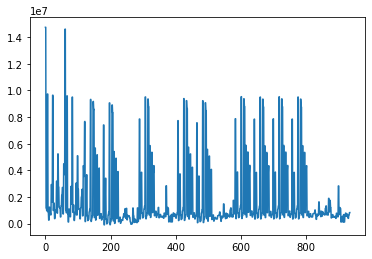

In [392]:
# Scatter plot of comp_diff
plt.plot(comp_and_propandtrans_table.comp_diff)

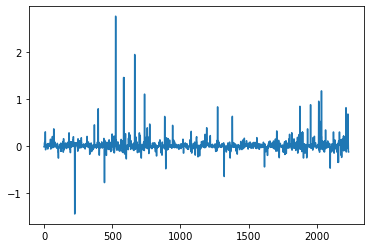

In [393]:
# Scatter plot of logerror
plt.plot(propertiesAndTransactions.logerror)

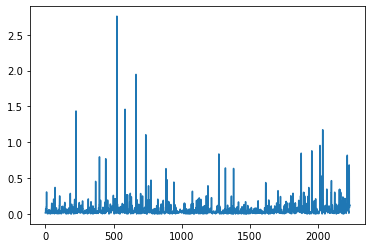

In [394]:
# Scatter plot of abs_logerror
plt.plot(propertiesAndTransactions.abs_logerror)

(array([2.152e+03, 4.800e+01, 1.400e+01, 8.000e+00, 4.000e+00, 4.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([0.    , 0.2758, 0.5516, 0.8274, 1.1032, 1.379 , 1.6548, 1.9306,
        2.2064, 2.4822, 2.758 ]),
 <a list of 10 Patch objects>)

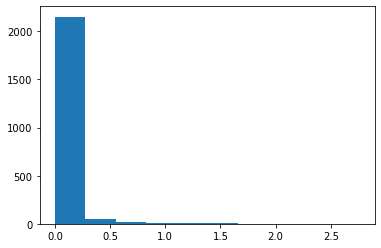

In [399]:
plt.hist(propertiesAndTransactions.abs_logerror)

(array([1654.,  352.,   98.,   48.,   24.,   10.,   12.,    2.,    0.,
           8.,    0.,    6.,    6.,    2.,    0.,    0.,    2.,    2.,
           0.,    0.,    2.,    2.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    2.]),
 array([0.     , 0.06895, 0.1379 , 0.20685, 0.2758 , 0.34475, 0.4137 ,
        0.48265, 0.5516 , 0.62055, 0.6895 , 0.75845, 0.8274 , 0.89635,
        0.9653 , 1.03425, 1.1032 , 1.17215, 1.2411 , 1.31005, 1.379  ,
        1.44795, 1.5169 , 1.58585, 1.6548 , 1.72375, 1.7927 , 1.86165,
        1.9306 , 1.99955, 2.0685 , 2.13745, 2.2064 , 2.27535, 2.3443 ,
        2.41325, 2.4822 , 2.55115, 2.6201 , 2.68905, 2.758  ]),
 <a list of 40 Patch objects>)

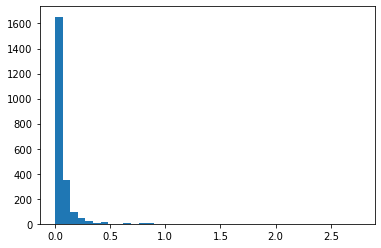

In [400]:
plt.hist(propertiesAndTransactions.abs_logerror,bins=40)

In [501]:
propertiesAndTransactions['year_month'] = pd.to_datetime(propertiesAndTransactions.transactiondate)
propertiesAndTransactions.to_sql('propertiesAndTransactions', conn, if_exists='replace', index=False)

In [502]:
prop_and_trans_groupby_month = propertiesAndTransactions[['year_month','abs_logerror']].groupby(['year_month']).mean()

prop_and_trans_groupby_month

,abs_logerror
year_month,
2016-01-04,0.011100
2016-01-05,0.071750
2016-01-06,0.023700
2016-01-07,0.065100
2016-01-08,0.064150
...,...
2017-09-13,0.065672
2017-09-14,0.012129
2017-09-15,0.049597


In [503]:
print(prop_and_trans_groupby_month.groupby(pd.Grouper(freq='D')).mean())

            abs_logerror
year_month              
2016-01-04      0.011100
2016-01-05      0.071750
2016-01-06      0.023700
2016-01-07      0.065100
2016-01-08      0.064150
...                  ...
2017-09-15      0.049597
2017-09-16           NaN
2017-09-17           NaN
2017-09-18      0.069977
2017-09-19      0.016698

[625 rows x 1 columns]


In [504]:
prop_and_trans_groupby_month = prop_and_trans_groupby_month.reset_index()

#### This graph shows the mean error between estimated value and actual sale value per month. It shows spikes in January and March of 2017.

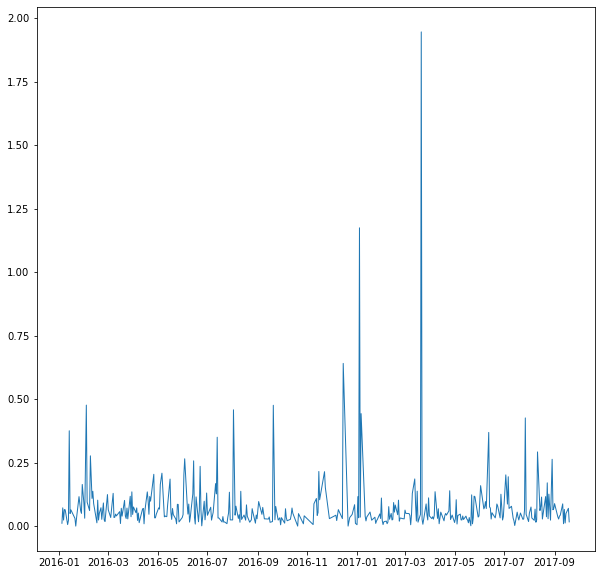

In [505]:
plt.figure(figsize=(10, 10))
plt.plot(prop_and_trans_groupby_month['year_month'],prop_and_trans_groupby_month.abs_logerror,linewidth=1.0)

In [512]:
conn.close()

### Milestone Conclusion

In this milestone, we stored the three datasets in the sqlite database. Using some queries and also usingdataframe's groupby function, we were able to produce some graphs and tables. We also used gmaps package from google to locate some properties on the map using longitude and latitude. The heat maps showed the intensoty of absoloute log erros and also the price.

### Project Conclusion

This project involved collecting data related to the properties that were listed and sold in souther california in 2016 and 2017. We also has a corresponding dataset that stored the sale transaction date and error between estimated price and actual sale proce. The intent is to miimize this error.  We took a sampling of these two data sets and used longitude and latitude of the properties to find compariable properities in the same zip code. We achived this by  web scraping the web site https://www.trulia.com/. We also used obtained Geographic Location Coordinates of 20 properties(due to response time limitation cosnstraint) using google maps API. Given the longitue and latitude, this API privided a host of information, but we decided to collect location type along with longitude and latitude and the view from the property(not so useful!).

